In [51]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [35]:
data = pd.read_csv("/kaggle/input/iris/Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# 꽃 너비는 부적합 꽃 받침 너비가 확실히 차이가 있어보임 
# 꽃 길이도 애매하 보임 꽃 받침 길이
# species = 종
# 꽃 받침 너비, 길이를 이용해서 species 분류하는 것 을 학습시킴
# 1.꽃 받침 너비와 길이 데이터를 가져와 2차원 배열로 만들고 (단독변수 (x축))
# 2.특징에 따른 종 분류하는 것 을 학습시킨다
# 3.


In [61]:
feature_col = data[['PetalLengthCm','PetalWidthCm']]
feature_col

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [8]:
import numpy as np

In [101]:
P_length = data[['PetalLengthCm']]
P_width  = data[['PetalWidthCm']]

#P_length

In [104]:
P_length_input = np.array(list(zip(*P_length.values.T))) 
#P_length_input
P_width_input = np.array(list(zip(*P_width.values.T))) 

In [65]:
#2차원 배열 생성
data_train_input = np.array(list(zip(*feature_col.values.T))) 

#data_train_input

In [106]:
#y축에 들어갈거 종속변수
species_col= data[['Species']] 
species_col 

#영어를 숫자로 바꿔야함
# pd.get_dummies() 이 함수는 0과 1의 형태로 변환해주는 함수라서 종 이 3개라서 사용하기 어려움
# 가능은 하는데 복잡해 보임

species_col =  data['Species'].map({'Iris-setosa' : 0, 'Iris-versicolor' : 1, 'Iris-virginica' : 2  }) #map 대신 replace 사용해 봤는데 에러뜸
species_col

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

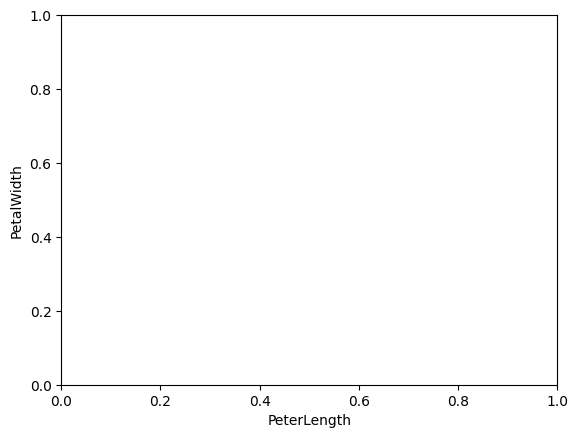

In [73]:
#plt.scatter(data_train_input, species_col)  #species_col = 0 일떄
#plt.scatter(data_train_input, species_col)  #species_col = 1 일떄
#plt.scatter(data_train_input, species_col)  #species_col = 2 일떄
plt.xlabel('PeterLength')
plt.ylabel('PetalWidth')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [71]:
train_input, test_input, train_target, test_target = train_test_split(
data_train_input, species_col, random_state=42)

In [99]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.n_neighbors = 3
knr.fit(train_input, train_target)

print(knr.score(train_input, train_target))
knr.score(test_input, test_target) #과대적합

0.9725725480592629


0.9958483557303617

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
